## Case Study Project - Food Claims Process
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast food establishments, customers make claims against the company.For example, they blame Vivendo for suspected food poisoning.The legal team, who processes these claims,is currently split across four locations. The dataset for this case study comprises of 8 columns and 98 rows

# Questions to be answered for the analysis are as follows:
> ● How does the number of claims differ across locations?
> ● What is the distribution of time to close claims?
> ● How does the average time to close claims differ by location?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Wrangling

In [2]:
df = pd.read_csv('C:\\Users\\sodiq\\Downloads\\claims.csv')

In [3]:
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [6]:
#Checking the number or rows and columns in the dataset
df.shape

(98, 8)

In [7]:
#Checking if the dataset has duplicates
sum(df.duplicated())

0

In [4]:
#checking the distribution of the data
df.describe()

,Time to Close,Amount Paid,Individuals on Claim
count,98.000000,98.000000,98.000000
mean,832.346939,58448.238571,4.908163
std,686.851131,87525.873849,7.292259
min,-57.000000,999.680000,0.000000
25%,340.750000,15965.642500,1.000000
50%,638.500000,29451.040000,2.000000
75%,1138.750000,52114.760000,5.750000
max,3591.000000,558725.770000,41.000000


In [5]:
#showing the types of the dataset
df.dtypes

Claim ID                 object
Time to Close             int64
Claim Amount             object
Amount Paid             float64
Location                 object
Individuals on Claim      int64
Linked Cases               bool
Cause                    object
dtype: object

It can be observed that two columns from the dataset need to be cleaned. The columns are claim amount and Cause which will have to replace NAN with 'UNKNOWN'

In [6]:
df['Cause']=df.Cause.replace(np.nan,'UNKNOWN')

In [7]:
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,UNKNOWN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,UNKNOWN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,UNKNOWN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


From the above table, It can be seen that NAN has been replaced with 'UNKNOWN'

In [8]:
df['Claim Amount'] = df['Claim Amount'].apply(lambda x: x.replace(',','').replace('R$',''))

df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.00,34297.47,RECIFE,2,False,UNKNOWN
1,0000000-00.2011.0.00.0086,3591,180000.00,56383.54,SAO LUIS,7,False,UNKNOWN
2,0000000-00.2012.0.00.0092,2997,70000.00,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.00,29217.16,FORTALEZA,4,False,UNKNOWN
4,0000000-00.2014.0.00.0097,117,29000.00,12610.50,FORTALEZA,1,False,meat


The unnecessary charcaters have been removed from the Claim Amount column

In [9]:
df.dtypes

Claim ID                 object
Time to Close             int64
Claim Amount             object
Amount Paid             float64
Location                 object
Individuals on Claim      int64
Linked Cases               bool
Cause                    object
dtype: object

In [10]:
#converting to float data type
df['Claim Amount'] = df['Claim Amount'].astype('float')

In [11]:
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,UNKNOWN
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,UNKNOWN
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,UNKNOWN
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat


# Exploratory Data Analysis

## How does the number of claims differ across locations?

In [12]:
df.Location.value_counts()

SAO LUIS     30
RECIFE       25
FORTALEZA    22
NATAL        21
Name: Location, dtype: int64

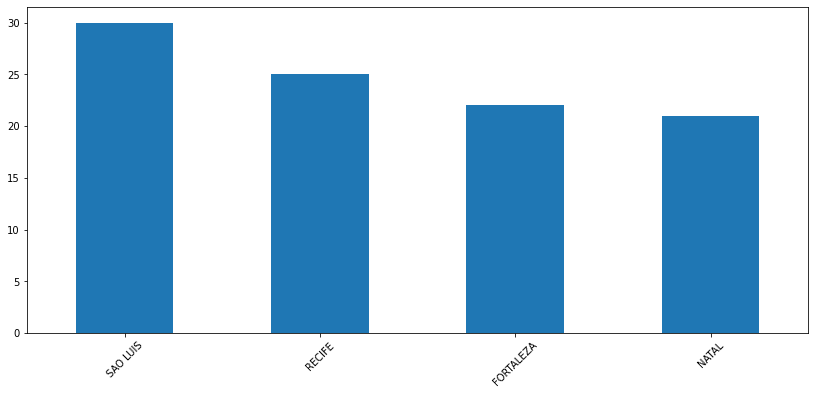

In [24]:
df.Location.value_counts()
df.Location.value_counts().plot(kind='bar',figsize=[14,6])
plt.xticks(rotation = 45);

It can be deduced from the above bar chart that SAO LUIS and NATAL have the highest and lowest claims respectively.

# What is the distribution of time to close claims?

<AxesSubplot:>

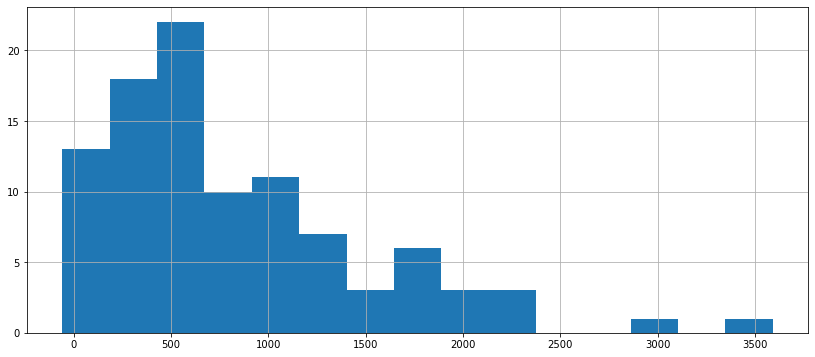

In [23]:
df['Time to Close' ].hist(bins= 15, figsize=[14,6])

The distribution of time to close is right skewed which means the mean is greater than the median and the mode as well. It is also observed that most claim takes 500 days to close.

# How does the average time to close claims differ by location?

In [21]:
def myGrpPlot(df,grpvar,yvar,stat='mean'):
    '''
    docstring: IMPORTANT explain function here
    inputs: ...
    output:...
    '''
    #plot
    df.groupby([grpvar])[yvar].agg(stat).plot.bar(edgecolor='black',figsize=[14,6],rot=0,width=0.8);
    #tidying up labels
    grpvar= grpvar.replace('_','') #replacing _ with a space
    yvar=yvar.replace('_','') #replacing _ with a space
    #adding title and formating it
    plt.title(f'{stat} of {yvar} by {grpvar}'.title(),fontsize=14,weight='bold')
    #adding x label and formating it
    plt.xlabel(grpvar.title(),fontsize=10,weight='bold')
    #adding y label and formating it
    plt.ylabel(f'{stat} {yvar}'.title(),fontsize=10,weight='bold')

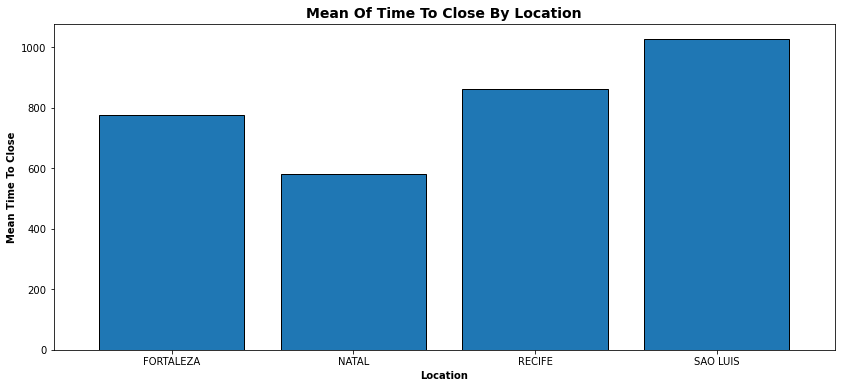

In [22]:
#checking which state has the highest background checks for firearms
myGrpPlot(df,'Location','Time to Close')

The SAO LUIS has the highest average time to close from the four locations

# What is the most cause of the poison?

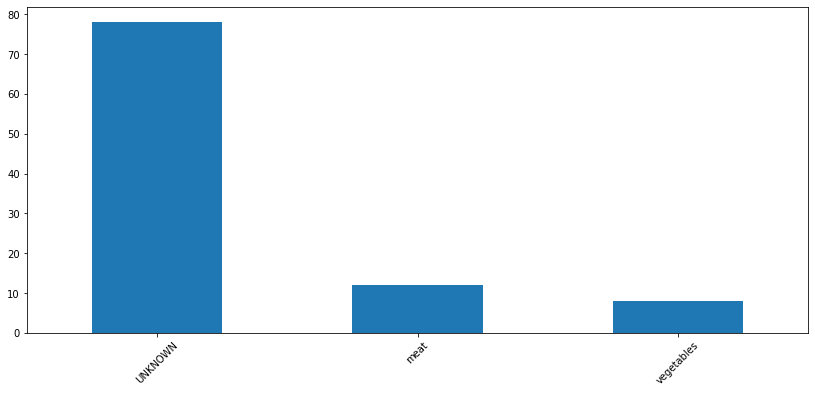

In [26]:
df.Cause.value_counts().plot(kind='bar',figsize=[14,6])
plt.xticks(rotation = 45);

It can be deduced from the above analysis that most cause of the poison is not known and the other causes are meat and vegetables.

# Correlation between the variables

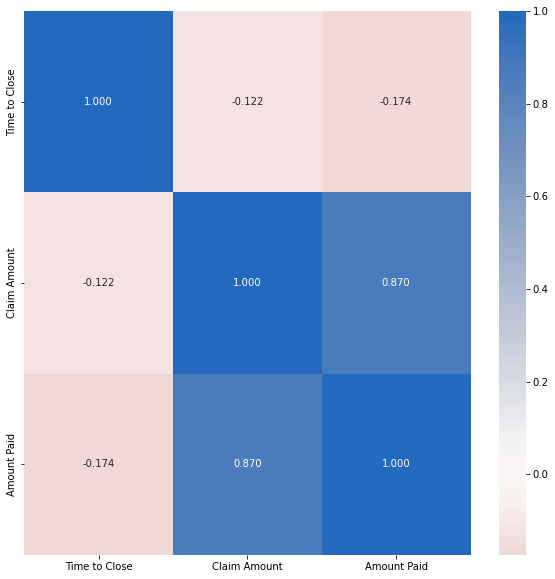

In [30]:
numeric_vars = ['Time to Close', 'Claim Amount', 'Amount Paid']
categoric_vars = ['CreditGrade', 'EmploymentStatus']

# correlation plot
plt.figure(figsize = [10, 10])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

It is shown that Claim Amount and Amount paid have a strong positive correlation, Claim Amount and Time to close has a weak negative correlation, Amount paid and Time to close have a weak negative correlation.

# Are the most cases linked to other cases?

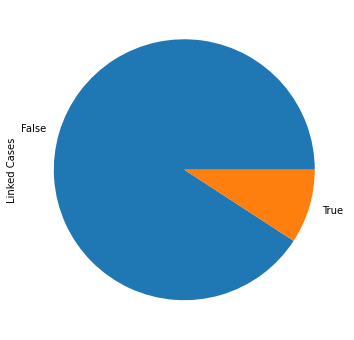

In [33]:
df['Linked Cases'].value_counts().plot(kind='pie',figsize=[14,6]);

It can be concluded from this analysis that most cases are not linked with other cases

# Conclusion
The dataset comprises of 98 rows and 8 columns. 
It can be deduced from the analysis that most cases are not linked to another cases.
It is shown that Claim Amount and Amount paid have a strong positive correlation, Claim Amount and Time to close has a weak negative correlation, Amount paid and Time to close have a weak negative correlation.
It can be deduced from the analysis that most cause of the poison is not known and the other causes are meat and vegetables.
The distribution of time to close is right skewed which means the mean is greater than the median and the mode as well. It is also observed that most claim takes 500 days to close.
It can be deduced from the above bar chart that SAO LUIS and NATAL have the highest and lowest claims respectively.